In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.7 0.1 0.2 --output ./end-to-end-potato-disease-classification-using-cnn/data_generated/splited_dataset ./end-to-end-potato-disease-classification-using-cnn/dataset/Potato/

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'splited_dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        #save_to_dir="AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [4]:
#count=0
#for image_batch, label_batch in train_generator:
#     print(label_batch)
#    print(image_batch[0])
#    break
#     count+=1
#     if count>2:
#         break

In [5]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'splited_dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'splited_dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


build model

In [9]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

/Users/ikram/miniconda3/envs/tf-arm/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=47, #numbre of train images / batch_size
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,#numbre of val images / batch_size
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.4695 - loss: 0.9124 - val_accuracy: 0.5312 - val_loss: 0.8469
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 1:03 1s/step - accuracy: 0.5625 - loss: 0.8980

/Users/ikram/miniconda3/envs/tf-arm/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.5625 - loss: 0.8980 - val_accuracy: 0.6094 - val_loss: 0.8645
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6282 - loss: 0.7362 - val_accuracy: 0.6354 - val_loss: 0.6741
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.7188 - loss: 0.5081 - val_accuracy: 0.7500 - val_loss: 0.5674
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.7687 - loss: 0.5164 - val_accuracy: 0.7760 - val_loss: 0.4676
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.7188 - loss: 0.4722 - val_accuracy: 0.7396 - val_loss: 0.5259
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.7849 - loss: 0.4569 - val_accuracy: 0.8490 - val_loss: 0.3505
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8750 - loss: 0.3182 - val_accuracy: 0.8021 - val_loss: 0.4306
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8569 - loss: 0.3390 - val_accuracy: 0.9010 - val_loss: 0.2493

evaluation

In [13]:
scores = model.evaluate(test_generator)
print(scores)

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 550ms/step - accuracy: 0.9304 - loss: 0.1815
[0.18154753744602203, 0.9303944110870361]


In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

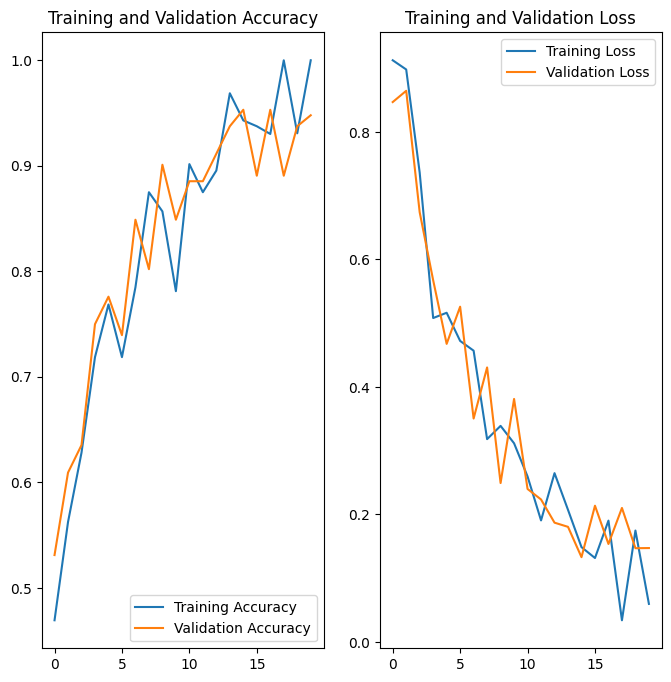

In [15]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:

count=0
for image_batch, label_batch in test_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.54228175 0.4834582  0.4952229 ]
  [0.54026854 0.48144495 0.49320966]
  [0.53788686 0.47906333 0.49082804]
  ...
  [0.6410369  0.6175075  0.6331938 ]
  [0.7368544  0.71332496 0.72901124]
  [0.6178434  0.594314   0.61000025]]

 [[0.5631499  0.5043264  0.5160911 ]
  [0.563957   0.50513345 0.51689816]
  [0.5621708  0.5033473  0.515112  ]
  ...
  [0.64654064 0.62301123 0.6386975 ]
  [0.73705757 0.7135281  0.72921443]
  [0.60960823 0.5860788  0.6017651 ]]

 [[0.52844244 0.46961886 0.48138356]
  [0.53063697 0.47181347 0.4835782 ]
  [0.5333163  0.47449282 0.48625752]
  ...
  [0.65398324 0.6304538  0.6461401 ]
  [0.72723335 0.70370394 0.7193902 ]
  [0.6039519  0.58042246 0.59610873]]

 ...

 [[0.5694499  0.5459205  0.5537636 ]
  [0.5756256  0.5520962  0.5599393 ]
  [0.5904215  0.5668921  0.5747352 ]
  ...
  [0.65838975 0.63486034 0.6505466 ]
  [0.6586874  0.635158   0.6508443 ]
  [0.65882355 0.63529414 0.6509804 ]]

 [[0.5688545  0.5453251  0.55316824]
  [0.576221   0.5526916  0.5605347 ]


Run prediction on a sample image

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
predicted label: Potato___Early_blight


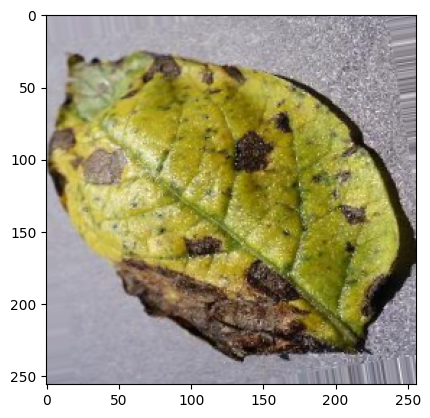

In [22]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

Write a function for inference

In [23]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


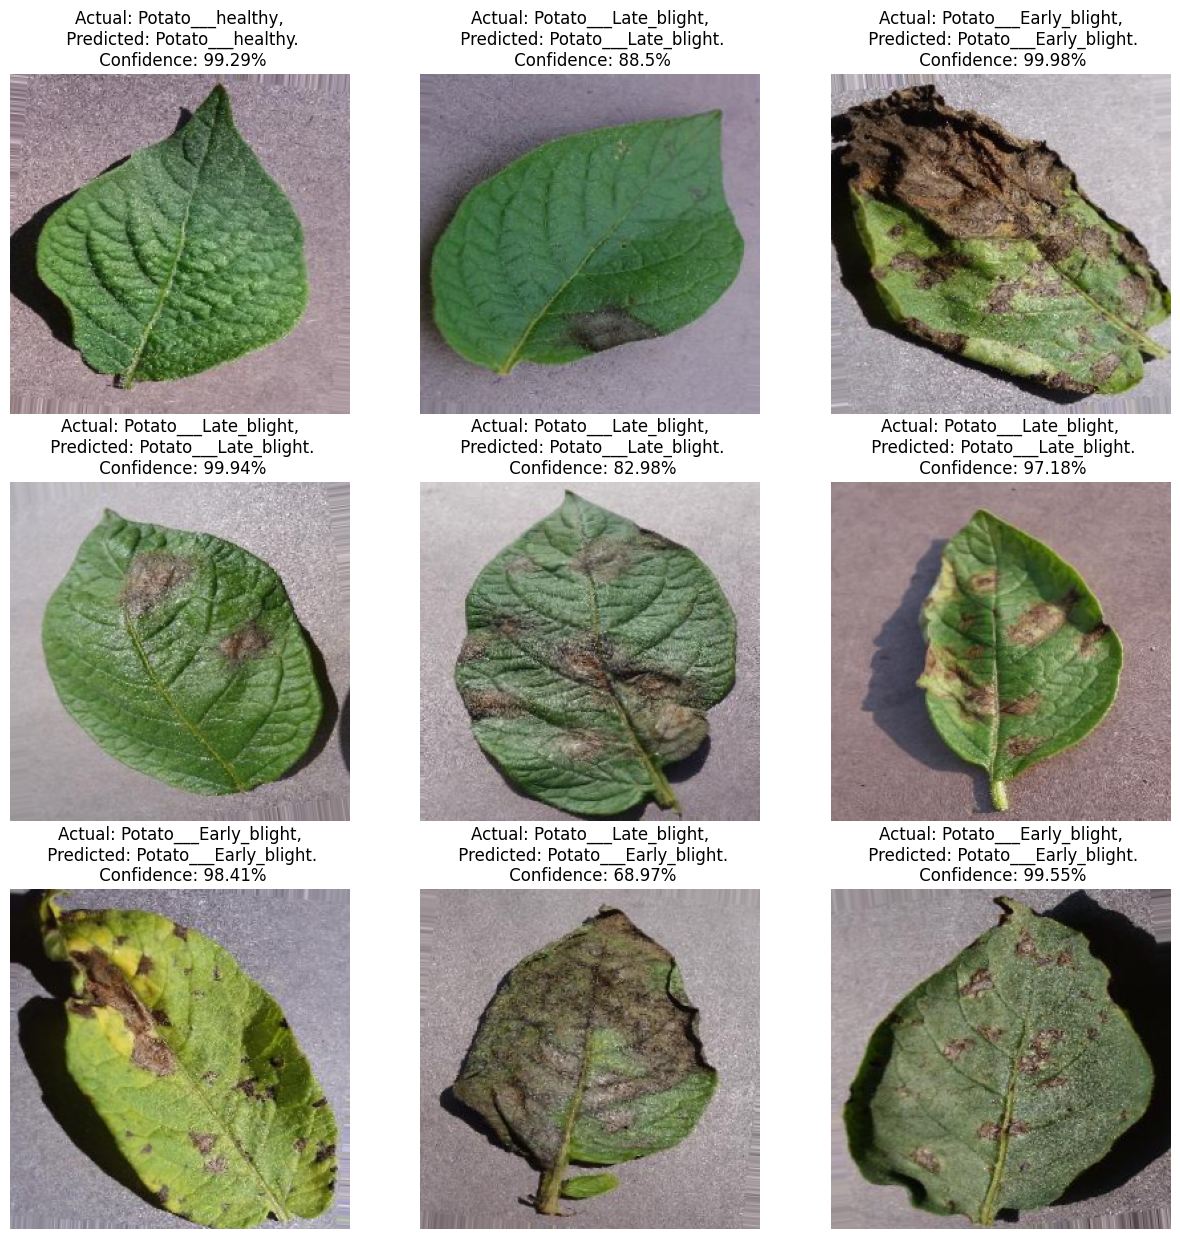

In [24]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [31]:
import os

models_dir = "../models"
os.makedirs(models_dir, exist_ok=True)

# Récupérer uniquement les fichiers qui ont un nom numérique avant l'extension
existing_versions = []
for name in os.listdir(models_dir):
    if name.endswith(".h5"):
        base = name.replace(".h5", "")
        if base.isdigit():
            existing_versions.append(int(base))

model_version = max(existing_versions + [0]) + 1

save_path = os.path.join(models_dir, f"version_generated_{model_version}_potatos.h5")
model.save(save_path)

print(f"✅ Modèle sauvegardé dans : {os.path.abspath(save_path)}")


✅ Modèle sauvegardé dans : /Users/ikram/Desktop/github-project/end-to-end-potato-disease-classification-using-cnn/models/version_generated_1_potatos.h5
